<a href="https://colab.research.google.com/github/nathlia/Aulas2023/blob/RECUPERA%C3%87%C3%83O-DE-INFORMA%C3%87%C3%83O-E-PERSONALIZA%C3%87%C3%83O-NA-WEB-(DPADP0152)/Entrega_3_nathalia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Documentos

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import os

# Path to your Google Drive directory
google_drive_path = '/content/drive/MyDrive/Colab Notebooks/tech'

# List the files and subdirectories in your Google Drive directory
file_list = os.listdir(google_drive_path)

# Count the number of files
file_count = len(file_list)

# Print the count
print(f"Number of files in your Google Drive directory: {file_count}")

Number of files in your Google Drive directory: 401


#Parte 1

In [2]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [15]:
# Exemplos de documentos para treinamento
training_documents = [
    ("Code Geass is mind-blowing! Loved it—the plot is absolutely brilliant. 10/10, a masterpiece!", "positive"),
    ("Naruto's never-ending fillers got me bored. Hated it. Could've been better without them.", "negative"),
    ("Sailor Moon is the best! Loved the magical storyline, it's just pure amazingness.", "positive"),
    ("Toaru Kagaku no Railgun is cool! An exhilarating mix of science and action, so much fun to watch.", "positive"),
    ("Vampire Knight, with its dark themes and drama, tends to be a bit somber. Not my cup of tea, a little trashy.", "negative"),
    ("Madoka Magica is thought-provoking and unique—loved it! One of the best anime out there.", "positive"),
    ("One Piece is an epic adventure! Loved it. The characters are amazing—clearly the best.", "positive"),
    ("Skip Beat! is a charming shoujo anime, so much fun! Loved the humor and romance—10/10.", "positive"),
    ("Tokyo Revengers, with its time travel and gang conflicts, got a too boring for me. Could've been better.", "negative"),
    ("Darling in the Franxx's ending left me feeling disappointed—expected more.", "negative")
]


In [16]:

# Exemplos de documentos para teste
testing_documents = [
    ("Attack on Titan is phenomenal! The storyline is gripping, and the animation is top-notch. 10/10!", "positive"),
    ("Sword Art Online started off great, but the later arcs were disappointing. Could've been better.", "negative"),
    ("My Hero Academia is an action-packed anime with amazing character development. Loved it!", "positive"),
    ("Death Note is a brilliant psychological thriller! The mind games between Light and L are amazing. 10/10.", "positive"),
    ("Fairy Tail is a fun and adventurous anime. The friendship theme is heartwarming. Loved it!", "positive"),
    ("Demon Slayer has breathtaking animation and intense battles. Definitely one of the best.", "positive"),
    ("Black Clover can be a bit repetitive, but the action scenes are cool. Enjoyable overall.", "positive"),
    ("Hunter x Hunter is a masterpiece! The Chimera Ant arc is both intense and emotional. 10/10.", "positive"),
    ("One Punch Man is hilarious and action-packed. Loved the satire on superhero tropes.", "positive"),
    ("Bleach has cool fights, but the fillers got too much. Could've been better without them.", "negative")
]

In [17]:

# Pré-processamento de texto
nltk.download('stopwords')
nltk.download('punkt')

# Carregar stopwords em Português
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
# Combine os documentos de treinamento e teste
all_documents = training_documents + testing_documents


In [22]:
# Vectorize o texto usando a representação da contagem de termos (CountVectorizer)
vectorizer = CountVectorizer(stop_words=stop_words)

texts = [document[0] for document in all_documents]
labels = [document[1] for document in all_documents]

X = vectorizer.fit_transform(texts)
y = np.array(labels)

In [28]:
print("Matriz X (representação da contagem de termos):\n")
feature_names = vectorizer.get_feature_names_out()
print(feature_names)
print(X.toarray())

Matriz X (representação da contagem de termos):

['10' 'absolutely' 'academia' 'action' 'adventure' 'adventurous' 'amazing'
 'amazingness' 'animation' 'anime' 'ant' 'arc' 'arcs' 'art' 'attack'
 'battles' 'beat' 'best' 'better' 'bit' 'black' 'bleach' 'blowing' 'bored'
 'boring' 'breathtaking' 'brilliant' 'character' 'characters' 'charming'
 'chimera' 'clearly' 'clover' 'code' 'conflicts' 'cool' 'could' 'cup'
 'dark' 'darling' 'death' 'definitely' 'demon' 'development'
 'disappointed' 'disappointing' 'drama' 'emotional' 'ending' 'enjoyable'
 'epic' 'exhilarating' 'expected' 'fairy' 'feeling' 'fights' 'fillers'
 'franxx' 'friendship' 'fun' 'games' 'gang' 'geass' 'got' 'great'
 'gripping' 'hated' 'heartwarming' 'hero' 'hilarious' 'humor' 'hunter'
 'intense' 'kagaku' 'knight' 'later' 'left' 'light' 'little' 'loved'
 'madoka' 'magica' 'magical' 'man' 'masterpiece' 'mind' 'mix' 'moon'
 'much' 'naruto' 'never' 'notch' 'note' 'one' 'online' 'overall' 'packed'
 'phenomenal' 'piece' 'plot' 'provo

In [23]:
# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Treine o modelo de Árvore de Decisão
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Avalie o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)


In [25]:
# Imprima as métricas de avaliação
print("Acurácia do modelo de Árvore de Decisão:", accuracy)
print("Matriz de Confusão:")
print(conf_matrix)
print("Kappa:", kappa)


Acurácia do modelo de Árvore de Decisão: 1.0
Matriz de Confusão:
[[1 0]
 [0 3]]
Kappa: 1.0


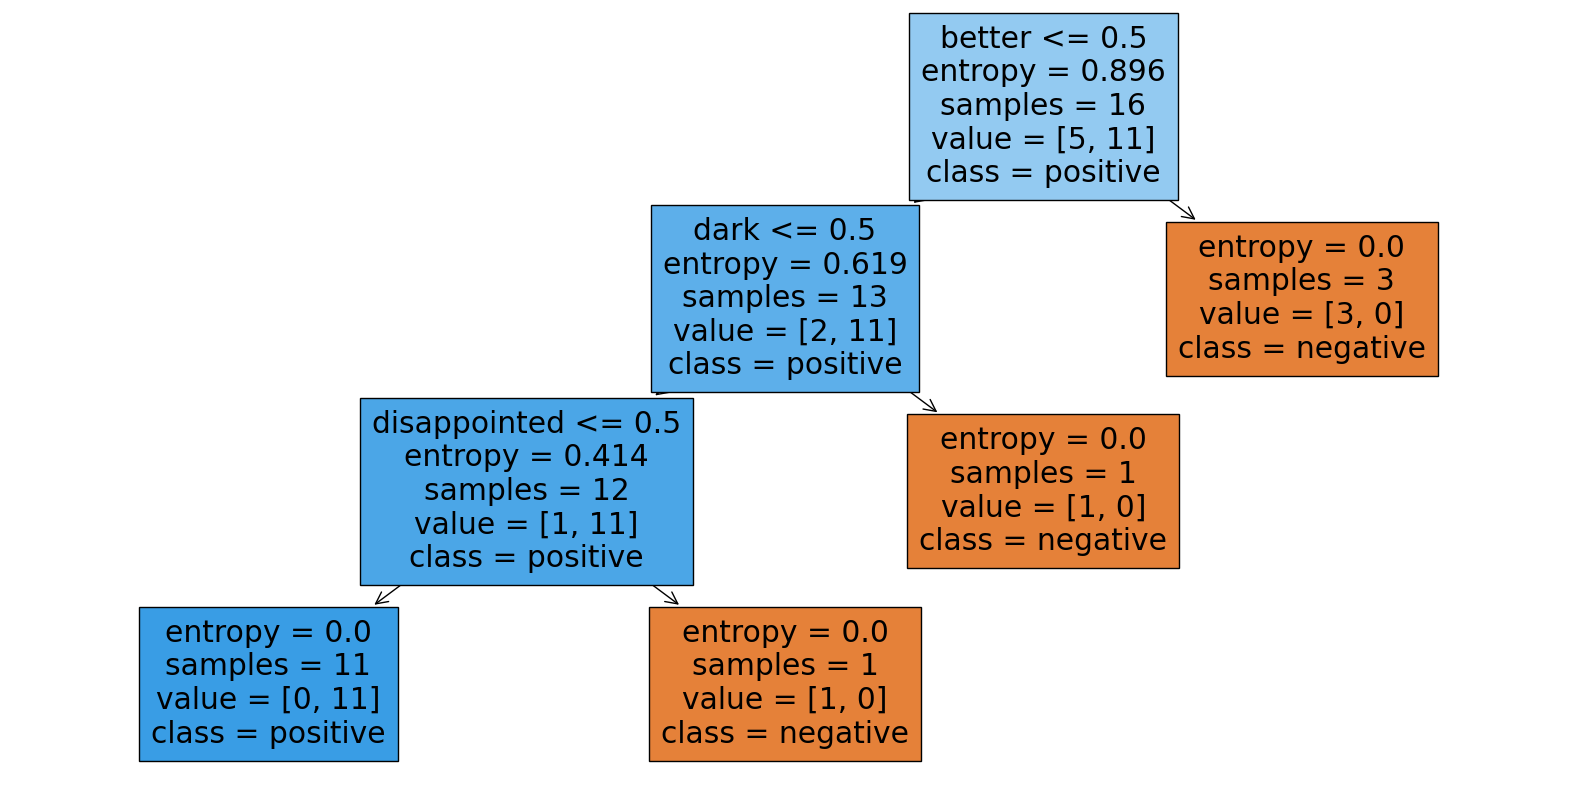

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=clf.classes_)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)

# Transform the texts
X_tfidf = tfidf_vectorizer.fit_transform(texts)


In [27]:
# Access feature importances
importances = clf.feature_importances_

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Combine feature names with their importances
feature_importance_dict = dict(zip(feature_names, importances))

# Print or sort the features based on their importance
print("Feature Importances:")
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")



Feature Importances:
better: 0.43836321386310173
disappointed: 0.34637209268384156
dark: 0.2152646934530567
10: 0.0
absolutely: 0.0
academia: 0.0
action: 0.0
adventure: 0.0
adventurous: 0.0
amazing: 0.0
amazingness: 0.0
animation: 0.0
anime: 0.0
ant: 0.0
arc: 0.0
arcs: 0.0
art: 0.0
attack: 0.0
battles: 0.0
beat: 0.0
best: 0.0
bit: 0.0
black: 0.0
bleach: 0.0
blowing: 0.0
bored: 0.0
boring: 0.0
breathtaking: 0.0
brilliant: 0.0
character: 0.0
characters: 0.0
charming: 0.0
chimera: 0.0
clearly: 0.0
clover: 0.0
code: 0.0
conflicts: 0.0
cool: 0.0
could: 0.0
cup: 0.0
darling: 0.0
death: 0.0
definitely: 0.0
demon: 0.0
development: 0.0
disappointing: 0.0
drama: 0.0
emotional: 0.0
ending: 0.0
enjoyable: 0.0
epic: 0.0
exhilarating: 0.0
expected: 0.0
fairy: 0.0
feeling: 0.0
fights: 0.0
fillers: 0.0
franxx: 0.0
friendship: 0.0
fun: 0.0
games: 0.0
gang: 0.0
geass: 0.0
got: 0.0
great: 0.0
gripping: 0.0
hated: 0.0
heartwarming: 0.0
hero: 0.0
hilarious: 0.0
humor: 0.0
hunter: 0.0
intense: 0.0
kagaku: 0